<br>

<div style="display: flex; justify-content: space-between;">
    <img src="CLIMADA_logo_QR.png" alt="Logo 1" style="float: left; width: 350px; height: auto;">
    <img src="C3S–POS–LINE.png" alt="Logo 2" style="float: right; width: 200px; height: auto;">
</div>


# Heat Waves 01: Integration Test of CLIMADA Impact Assessment with Copernicus Climate Change Service (C3S) data (V1)

### About

Welcome to this tutorial, where we embark on a journey to analyze the impact of heat stress using CLIMADA in the context of the U-CLIMADAPT project (User-centric Assessment of Climate Change Impacts for Adaptation). This tutorial is part of a series of three, focusing on 01 Heat Waves, 02 Heat Stress, and 03 xx. Throughout these tutorials, we will demonstrate how we leverage climate data, particularly seasonal forecast data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), in conjunction with CLIMADA (CLIMate ADAptation), to estimate the socio-economic or human impacts of climate-related hazards.

### About U-CLIMADAPT

The U-CLIMADAPT project is a collaborative effort led by the Working Group "Impact of Climate Change." Its primary goal is to provide refined climate impact assessments tailored to specific requirements. To achieve this, it leverages the power of climate forecasts and projections from C3S's Climate Data Store (CDS), while also integrating Copernicus land-use and satellite data

### Discover New Possibilities

In U-CLIMADAPT, is dedicated to developing a comprehensive socioeconomic impact model chain using CLIMADA. Your feedback is invaluable as we shape this user-driven approach. Together, we address climate-related hazards like extreme heat, precipitation, agricultural drought, wind storms, and river floods, evaluating their impact on human health, agriculture, assets, and infrastructure. By actively collaborating with users like you from diverse sectors, including public authorities, industry, and academia, we ensure that our assessments are not only socio-economically relevant but also highly applicable to your needs.

### Tutorial Overview

Now, let's dive into the tutorial itself. We will guide you through the following steps:

- Search, download, and visualize the relevant data from the Climate Data Store.
- Set up the hazard, specifically focusing on heat stress.
- Estimate the exposure to heat stress in your chosen area.
- Define vulnerability and calculate the potential damage.

By following this tutorial, you will gain hands-on experience and unlock the potential of integrating CLIMADA with C3S data from Copernicus. Let's get started!

<br>

## Search, download and view Copernicus data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [64]:
#!pip install cdsapi

### If this pip does not work

#### Window
Please follow the instructions for the Windows installation provided at https://bit.ly/3I6va4D. 
Please note that the Windows installation process requires you to be registered with Copernicus and have a personal key (refer to [http://cds.climate.copernicus.eu] for more information). Additionally, you will need to create a text document in the installation folder of the API and name it ".cdsapirc.txt". Inside the document, paste the following information:

- url: https://cds.climate.copernicus.eu/api/v2
- key: ####################################### 

After saving the content, the document will be named .cdsapirc.txt. Rename the file by removing ".txt" extension.
Once this step is completed, install in the command prompt with "$ pip install cdsapi".

To summarize, the instructions are:

- Follow the installation instructions for cdsapi on Windows at https://bit.ly/3I6va4D.
- Create a text document in the installation folder and name it ".cdsapirc".
- Within the document, paste the provided information and save it.
- Rename the document by removing the ".txt" extension.
- Install cdsapi in the command prompt with "$ pip install cdsapi".


#### macOS
To install CDS API on a Mac, please follow the instructions at https://bit.ly/3LTOgfn.

Note that the installation on Mac requires creating a document with the Terminal where you will install the API. You can do this by typing "touch ~/.cdsapirc" in the Terminal. Then, open the document by typing "nano ~/.cdsapirc" and paste the following information into the document:

- url: https://cds.climate.copernicus.eu/api/v2
- key: #######################################

After saving the content of the document, install the CDS API in the Terminal by typing "pip install cdsapi".

- Follow the instructions on this website: https://bit.ly/3I6va4D to install cdsapi on a Mac.
- Navigate to the directory where you want to install the API by using the 'cd' command in Terminal.
- Type the command 'touch ~/.cdsapirc' in Terminal to create a file for the API key.
- Type the command 'nano ~/.cdsapirc' in Terminal to open the file in a text editor.
- Within the document, paste the provided information and save it.
- Save the file by pressing 'Ctrl + X' and then 'Y'.
- Type the command 'pip install cdsapi' in Terminal to install the cdsapi module.

### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [65]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (http://cds.climate.copernicus.eu), then visit https://cds.climate.copernicus.eu/api-how-to and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [66]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
#KEY = '196681:d1b1948e-0977-4fe7-b0d7-cb89ad415533'

In [67]:
from climada import CONFIG
KEY = str(CONFIG.cds_api_key)

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [68]:
#DATADIR = './'

In [69]:
import os
DATADIR = "/Users/daraya/Documents/test_data" # create a file to save the data
os.makedirs(DATADIR, exist_ok=True)

In [70]:
#import os
#from climada import CONFIG
#DATADIR = str(CONFIG.data_dir)
#os.mkdir(DATADIR, exist_ok=True)
#os.makedirs(DATADIR, exist_ok=True)

In [71]:
current_directory = os.getcwd()

# Print the current directory
print("Current Directory:", current_directory)

Current Directory: /Users/daraya/Documents


### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **"Show API request"** option.

In [72]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'sis-heat-and-cold-spells',
    {
        'format': 'tgz',
        'variable': 'heat_wave_days',
        'definition': 'health_related',
        'experiment': [
            'rcp8_5',
        ],
        'ensemble_statistic': [
            'ensemble_members_average',
        ],
    },
    f'{DATADIR}/sis-heat-and-cold-spells.tar.gz')

2023-10-02 14:30:22,547 INFO Welcome to the CDS
2023-10-02 14:30:22,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-heat-and-cold-spells
2023-10-02 14:30:22,643 INFO Request is completed
2023-10-02 14:30:22,645 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-heat-and-cold-spells-eb4205b1-be10-4c95-ae8d-58c67a335eae.tar.gz to /Users/daraya/Documents/test_data/sis-heat-and-cold-spells.tar.gz (40M)
2023-10-02 14:30:29,038 INFO Download rate 6.3M/s   


Result(content_length=41946935,content_type=application/gzip,location=https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-heat-and-cold-spells-eb4205b1-be10-4c95-ae8d-58c67a335eae.tar.gz)

### Inspect data

Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the [Xarray](http://xarray.pydata.org/en/stable/) library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an [xarray.Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [73]:
import tarfile
tar_file = f"{DATADIR}/sis-heat-and-cold-spells.tar.gz"

# Print files names and extract
with tarfile.open(tar_file, "r:gz") as file:
    print(file.getnames())
    file.extractall(DATADIR)

#file.close()

['HWD_EU_health_rcp85_mean_v1.0.nc']


In [74]:
hwd_eu_rcp85_mean = f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc'
hwd_eu_rcp85_mean

'/Users/daraya/Documents/test_data/HWD_EU_health_rcp85_mean_v1.0.nc'

In [75]:
ds = xr.open_dataset(hwd_eu_rcp85_mean)
ds

<xarray.Dataset>
Dimensions:        (lat: 425, lon: 599, time: 100)
Coordinates:
    height         float64 ...
  * lat            (lat) float64 30.1 30.2 30.3 30.4 ... 72.2 72.3 72.4 72.5
  * lon            (lon) float64 -24.9 -24.8 -24.7 -24.6 ... 34.6 34.7 34.8 34.9
  * time           (time) datetime64[ns] 1986-01-01 1987-01-01 ... 2085-01-01
Data variables:
    HWD_EU_health  (time, lat, lon) float32 ...
Attributes:
    title:          Processed EURO-CORDEX future climate data for the health ...
    conventions:    CF-1.6
    project:        Copernicus Climate Change Service Sectoral Information Sy...
    source:         Processing of bias-corrected EURO-CORDEX data by VITO
    contact:        bd_rma@vito.be
    creation_date:  Mon Jun 24 12:30:06 2019
    institution:    VITO (https://vito.be/en)

In [76]:
# Extract variable
hwd_eu_rcp85_mean = ds['HWD_EU_health']

# Extract variable for the time of interest with isel() method :)
# hwd_eu_rcp85_mean.isel(time=98) retrieves the data or value corresponding to the 98th time step of the variable hwd_eu_rcp85_mean, time range from 0-99.
# hwd_eu_rcp85_mean = hwd_eu_rcp85_mean.isel(time=60)

In [77]:
# Shape and sizes
print(hwd_eu_rcp85_mean.shape)
print(hwd_eu_rcp85_mean.size)

(100, 425, 599)
25457500


## Set up hazard

### Set a heat wave hazard 

In this first exercise, our goal is to analyze the heatwave hazard in Europe using the [heatwave days dataset from Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=overview). The dataset provides information for different future time periods and considers climate change scenarios, specifically RCP 8.5 and 4.6.

A bias-adjusted EURO-CORDEX dataset is utilized, offering temperature data from 1971 to 2100. By averaging the statistics over 30-year intervals, a smoothed mean time series spanning 1986 to 2085 is obtained. The dataset provides temperature data with a resolution of 0.1° in latitude and longitude, equivalent to approximately 11 kilometers at the equator.

By conducting this exercise, we aim to gain insights into the long-term heatwave trends in Europe, taking into account future projections and climate change scenarios. This analysis can contribute to a better understanding of the potential impacts of heatwaves on the region and inform relevant mitigation and adaptation strategies.

In [78]:
# Create a hazard

from climada.hazard import Hazard
from scipy.sparse import csr_matrix

intensity = ds['HWD_EU_health'].values
num_events = intensity.shape[0]

hwd_eu_rcp85_mean = f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc'
hazard = Hazard.from_xarray_raster_file(f'{DATADIR}/HWD_EU_health_rcp85_mean_v1.0.nc', 
                                        hazard_type='Heat_waves_days', 
                                        intensity_unit="days", 
                                        intensity="HWD_EU_health", 
                                        coordinate_vars=dict(event="time", longitude="lon", latitude="lat"))
hazard.check()

hazard.fraction = csr_matrix((hazard.intensity > 0).astype(int))

### Import class LitPop

2023-10-02 14:30:31,355 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,373 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,395 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,420 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,429 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,449 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-10-02 14:30:31,469 - climada.entity.exposures.litpop.gpw_populati

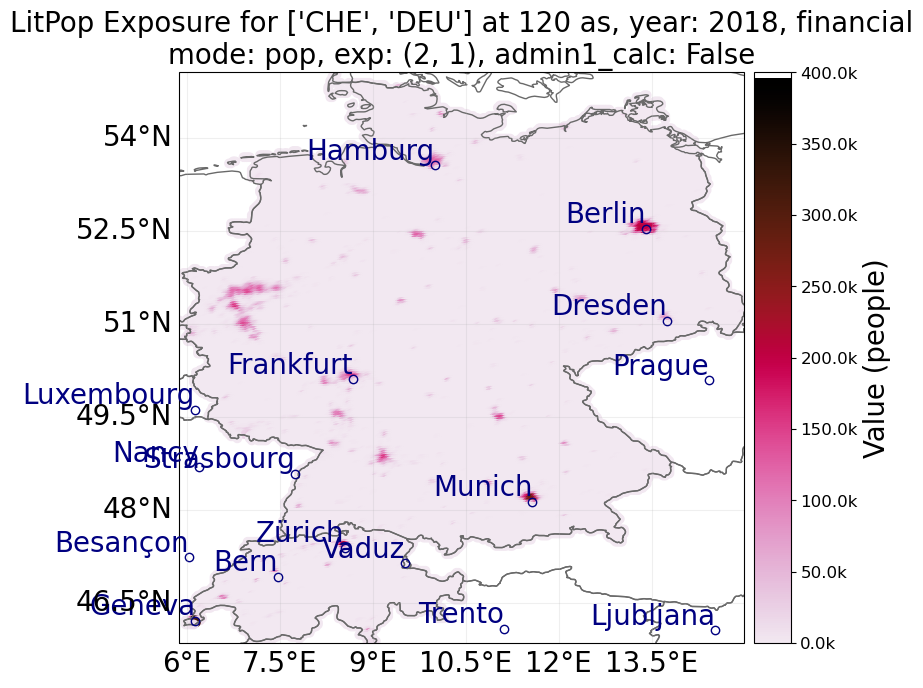

In [79]:
# Import class LitPop:
from climada.entity import LitPop
import rasterio

try:
    exposure = LitPop.from_countries(['CHE', 'DEU'], res_arcsec=120, fin_mode='pop', exponents=(2,1)) 
except FileExistsError as err:
    print("Reason for error: The GPW population data has not been downloaded, c.f. section 'Input data' above.")
    raise err

# Plot using exposure.plot_scatter()
plot = exposure.plot_scatter()

# Get the current axis
ax = plt.gca()

# Modify the size of axis labels
fontsize_val = 12
plt.xticks(fontsize=fontsize_val)
plt.yticks(fontsize=fontsize_val)

# Set y-ticks and their labels to represent values in thousands
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f'{ytick/1000:.1f}k' for ytick in yticks], clip_on=True)

# Ensure everything fits within the figure boundaries
plt.tight_layout()

# Show the plot
plt.show()

# Note that `exp.gdf.region_id` is a number identifying each country:
#print('\n Region IDs (`region_id`) in this exposure:')
#print(exposure.gdf.region_id.unique())

## Set up vulnerability and calculate damages

<AxesSubplot:title={'center':'Heat_waves_days 1: Heat wave impact function'}, xlabel='Intensity (days)', ylabel='Impact (%)'>

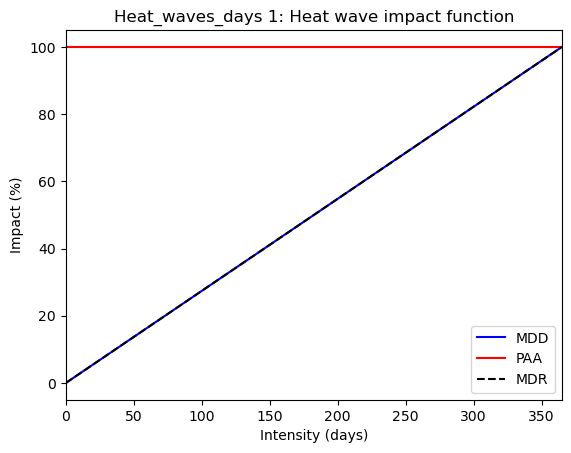

In [80]:
from climada.hazard import Hazard, Centroids
from scipy.sparse import csr_matrix
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
from climada.entity import LitPop
from climada.util.constants import ONE_LAT_KM
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# Method is used to assign the centroids of hazard events to the exposure data. This step allows for the association of hazard events with specific population locations.
exposure.assign_centroids(hazard)


# Define the impact function
if_set = ImpactFuncSet()
if_heatwave = ImpactFunc()
if_heatwave.haz_type = 'Heat_waves_days'
if_heatwave.id = 1
if_heatwave.name = 'Heat wave impact function'
if_heatwave.intensity_unit = 'days'
if_heatwave.intensity = np.arange(0, 366, 1) # Assuming the maximum number of heat wave days in a year is 365
if_heatwave.mdd = np.linspace(0, 1, 366) # Linearly increasing mean damage degree from 0 to 1
if_heatwave.paa = np.ones(366) # Assuming 100% of assets are affected for any number of heat wave days
if_set.append(if_heatwave) 

# Plot the impact function
if_heatwave.plot()

#### Calculate impact

In [81]:
# Calculate the impact
from climada.engine import ImpactCalc
heat_waves_impact = ImpactCalc(exposure, if_set, hazard).impact(save_mat=True)
filename = f'{DATADIR}/impact_output.xlsx'
heat_waves_impact.write_excel(filename) # Write the impact to an Excel file

In [82]:
filename_hfive = f'{DATADIR}/heat_waves_impact.h5'
heat_waves_impact.write_hdf5(filename_hfive)

TypeError: No conversion path for dtype: dtype('<M8[ns]')